In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\91990\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\91990\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\91990\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\91990\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import joblib, scipy, sklearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix


In [7]:

pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: C:\Users\91990\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import joblib, scipy, sklearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix


In [9]:

df = pd.read_csv('C:/Users/91990/Desktop/majorintern/cirrhosis.csv')
df.head()


ID  N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0   1     400      D  D-penicillamine  21464   F       Y            Y       Y   
1   2    4500      C  D-penicillamine  20617   F       N            Y       Y   
2   3    1012      D  D-penicillamine  25594   M       N            N       N   
3   4    1925      D  D-penicillamine  19994   F       N            Y       Y   
4   5    1504     CL          Placebo  13918   F       N            Y       Y   

  Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0     Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1     N        1.1        302.0     4.14    54.0    7394.8  113.52   
2     S        1.4        176.0     3.48   210.0     516.0   96.10   
3     S        1.8        244.0     2.54    64.0    6121.8   60.63   
4     N        3.4        279.0     3.53   143.0     671.0  113.15   

   Tryglicerides  Platelets  Prothrombin  Stage  
0          172.0      190.0         12.2    4.0  
1           88.0      221.0         10.6    3.0  
2           55.0      151.0         12.0    4.0  
3           92.0      183.0         10.3    4.0  
4           72.0      136.0         10.9    3.0

In [10]:

df.drop(['ID'],axis=1,inplace=True)


In [11]:
df.shape


(418, 19)

In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage     

In [13]:
df.describe()


N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   418.000000    418.000000  418.000000   284.000000  418.000000   
mean   1917.782297  18533.351675    3.220813   369.510563    3.497440   
std    1104.672992   3815.845055    4.407506   231.944545    0.424972   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1092.750000  15644.500000    0.800000   249.500000    3.242500   
50%    1730.000000  18628.000000    1.400000   309.500000    3.530000   
75%    2613.500000  21272.500000    3.400000   400.000000    3.770000   
max    4795.000000  28650.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  310.000000    312.000000  312.000000     282.000000  407.000000   
mean    97.648387   1982.655769  122.556346     124.702128  257.024570   
std     85.613920   2140.388824   56.699525      65.148639   98.325585   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     41.250000    871.500000   80.600000      84.250000  188.500000   
50%     73.000000   1259.000000  114.700000     108.000000  251.000000   
75%    123.000000   1980.000000  151.900000     151.000000  318.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   416.000000  412.000000  
mean     10.731731    3.024272  
std       1.022000    0.882042  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

In [14]:
df.isnull().sum() / len(df) * 100


N_Days            0.000000
Status            0.000000
Drug             25.358852
Age               0.000000
Sex               0.000000
Ascites          25.358852
Hepatomegaly     25.358852
Spiders          25.358852
Edema             0.000000
Bilirubin         0.000000
Cholesterol      32.057416
Albumin           0.000000
Copper           25.837321
Alk_Phos         25.358852
SGOT             25.358852
Tryglicerides    32.535885
Platelets         2.631579
Prothrombin       0.478469
Stage             1.435407
dtype: float64

In [15]:
df[df.duplicated()]


Empty DataFrame
Columns: [N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []

N_Days
Skewness: 0.4726020506759292
Kurtosis: -0.4821388331042038


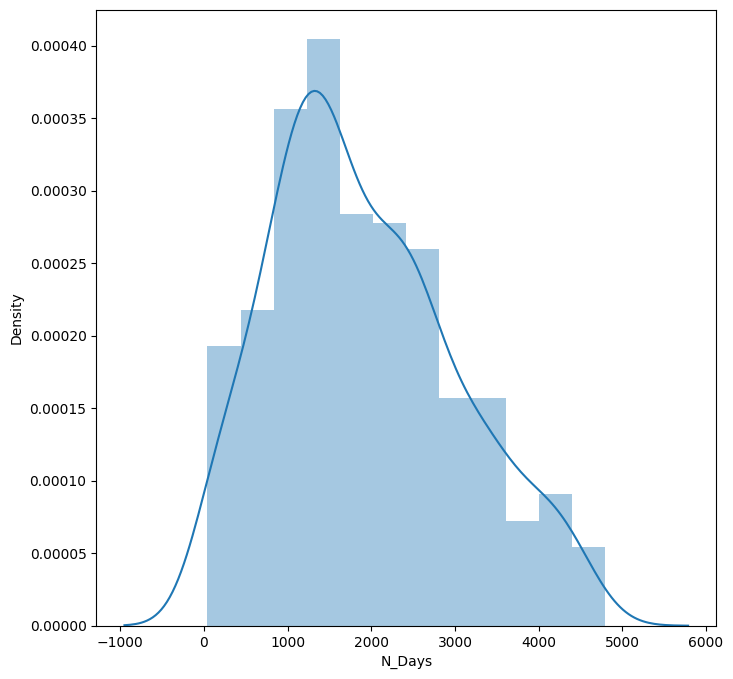

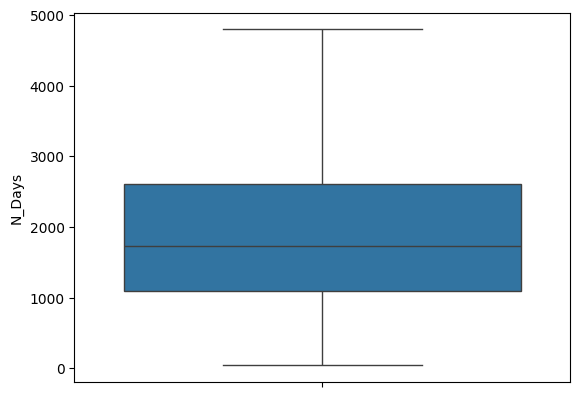

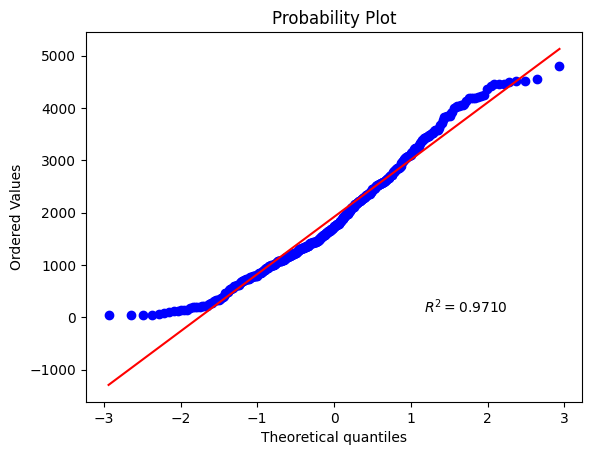

----------------------------
Age
Skewness: 0.08685015608405514
Kurtosis: -0.616730132346194


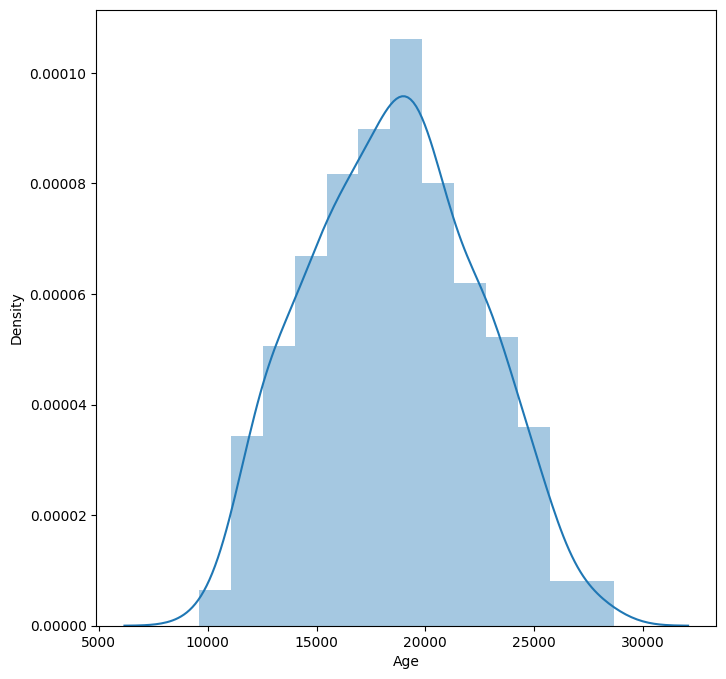

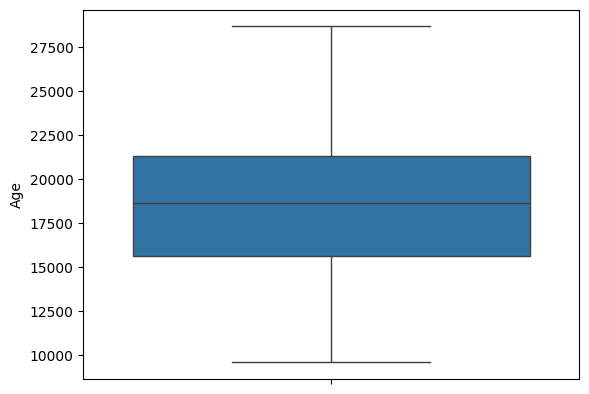

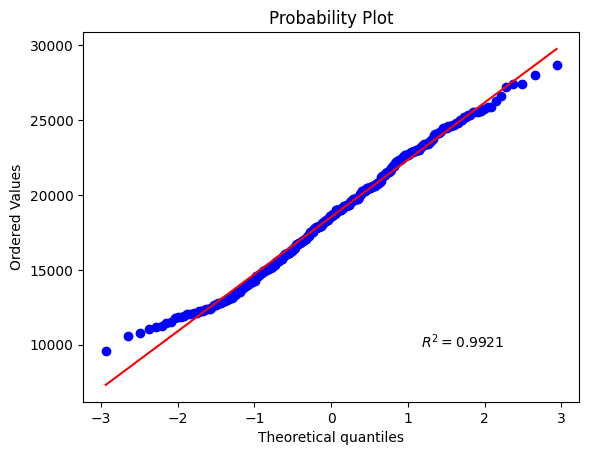

----------------------------
Bilirubin
Skewness: 2.717610708740455
Kurtosis: 8.065335678744502


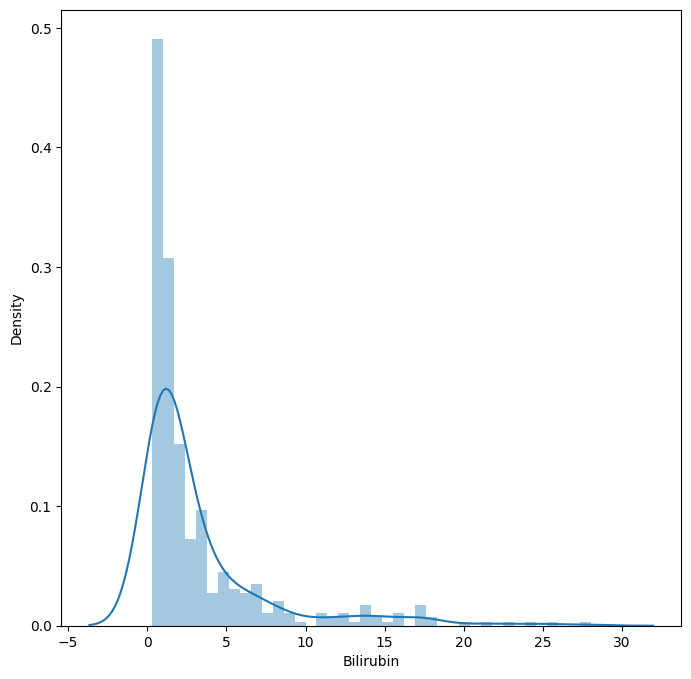

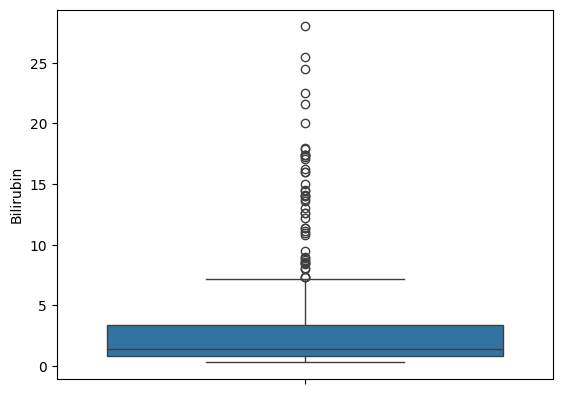

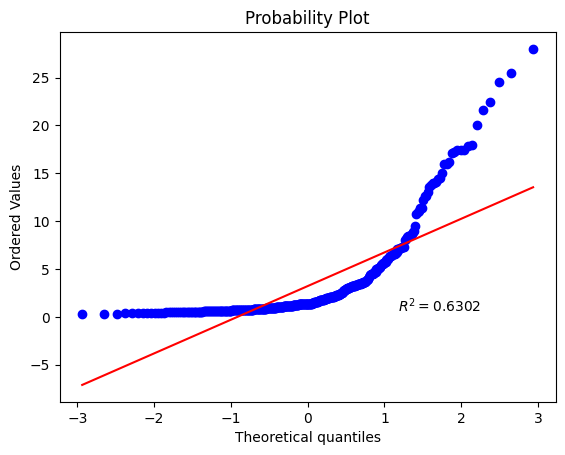

----------------------------
Cholesterol
Skewness: 3.408525855721416
Kurtosis: 14.337869865983716


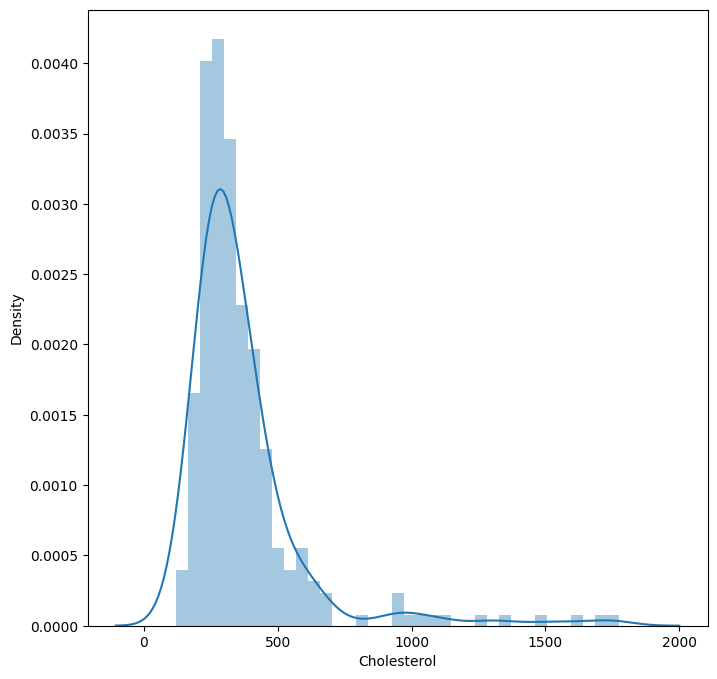

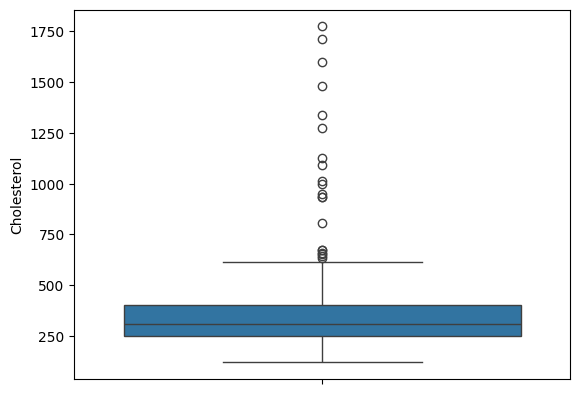

posx and posy should be finite values
posx and posy should be finite values


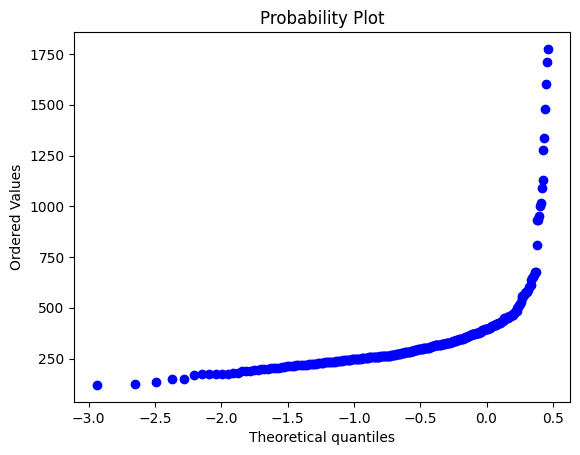

----------------------------
Albumin
Skewness: -0.4675265141762801
Kurtosis: 0.5667445291024173


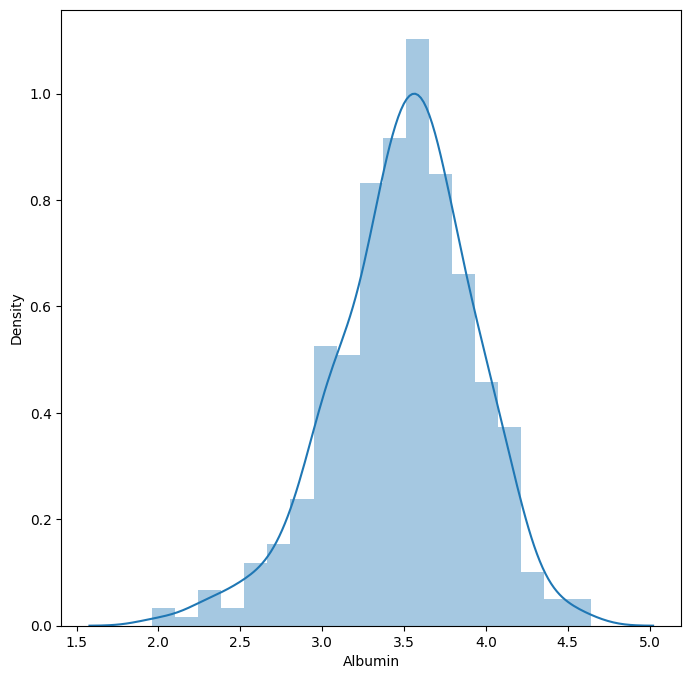

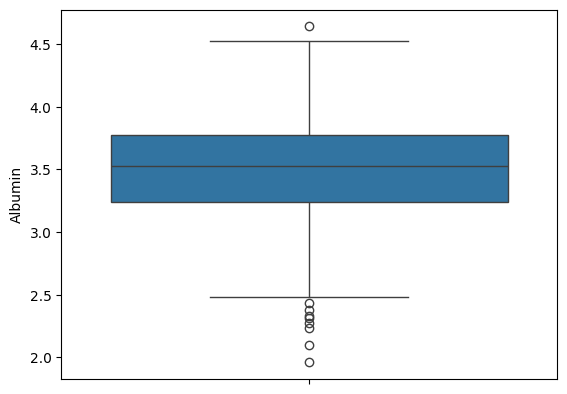

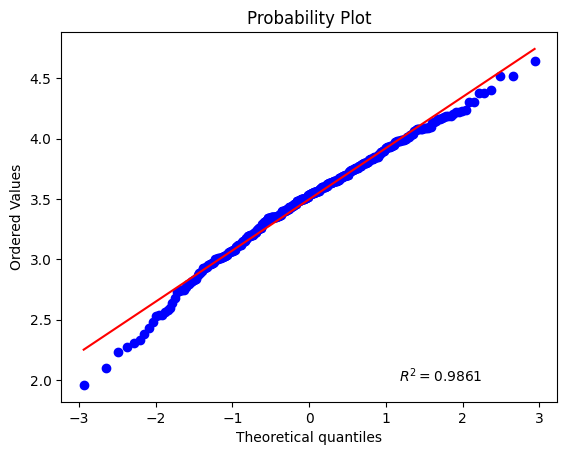

----------------------------
Copper
Skewness: 2.3036399957832616
Kurtosis: 7.624023449861701


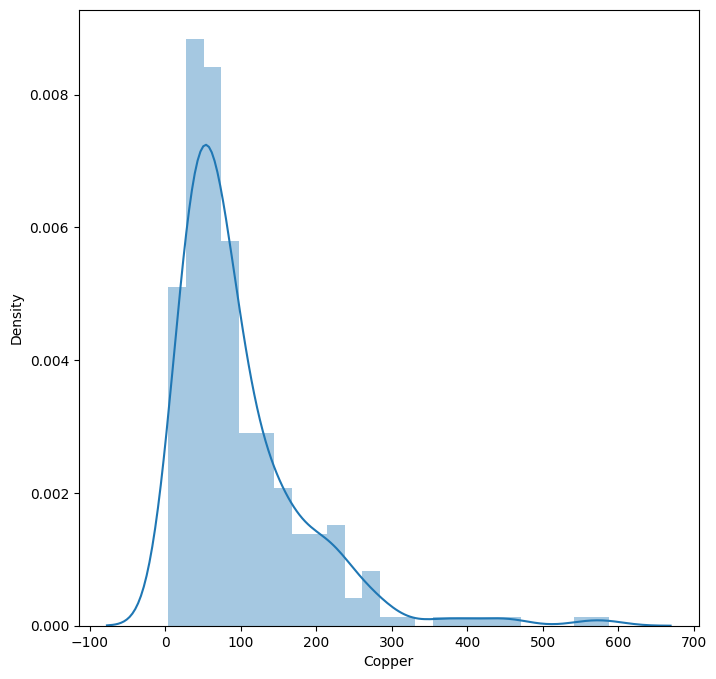

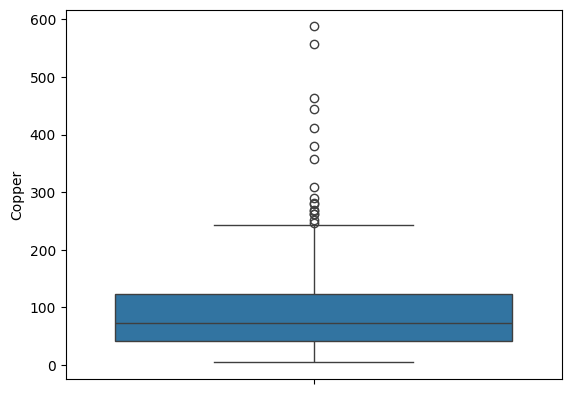

posx and posy should be finite values
posx and posy should be finite values


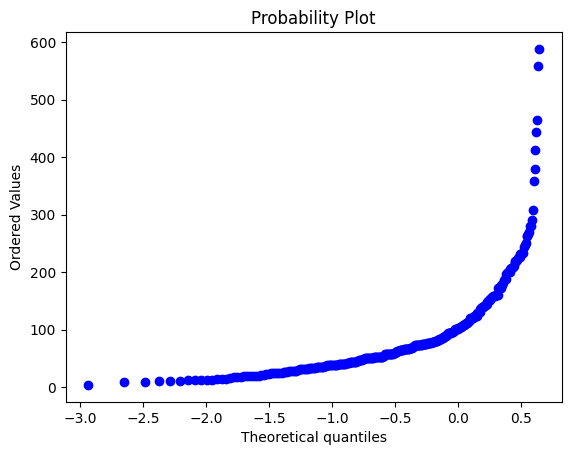

----------------------------
Alk_Phos
Skewness: 2.9928343153496115
Kurtosis: 9.662553460966153


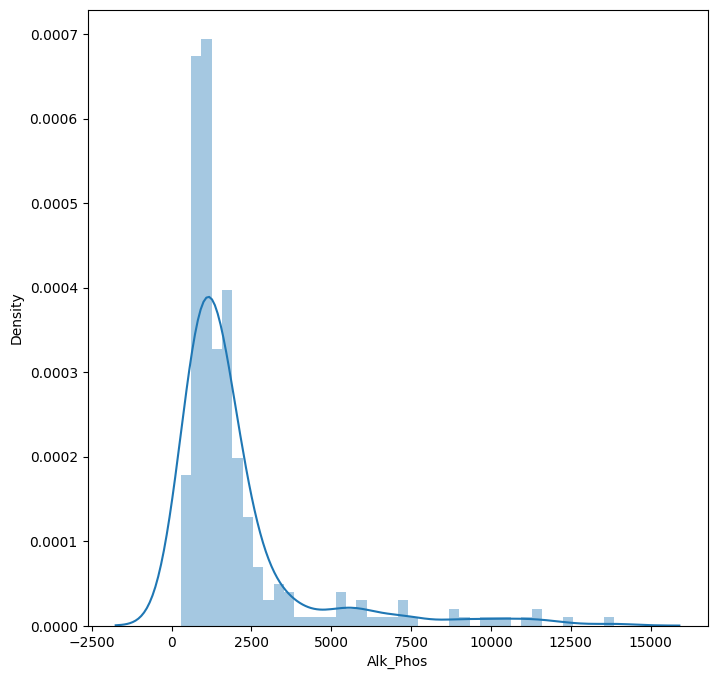

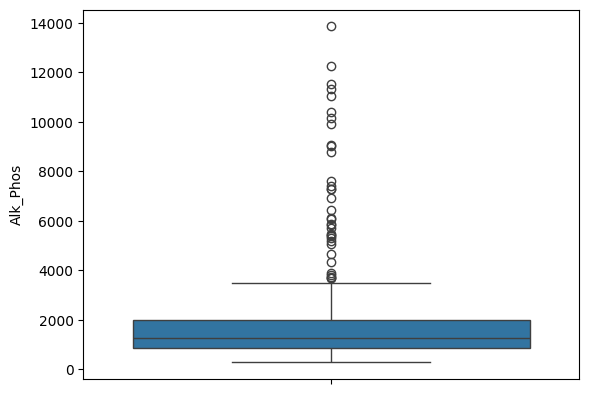

posx and posy should be finite values
posx and posy should be finite values


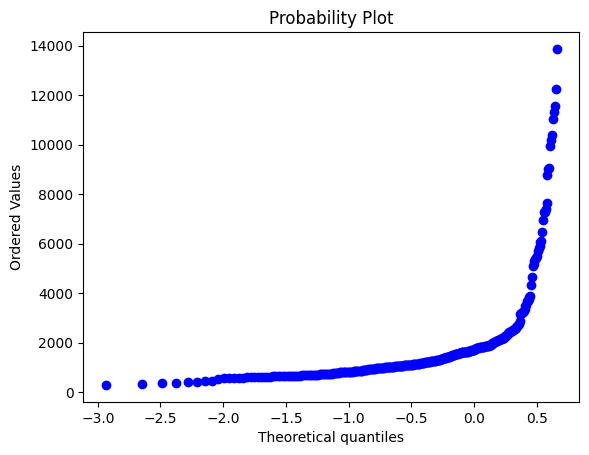

----------------------------
Sgot
Skewness: 1.4491969235882083
Kurtosis: 4.311975857605217


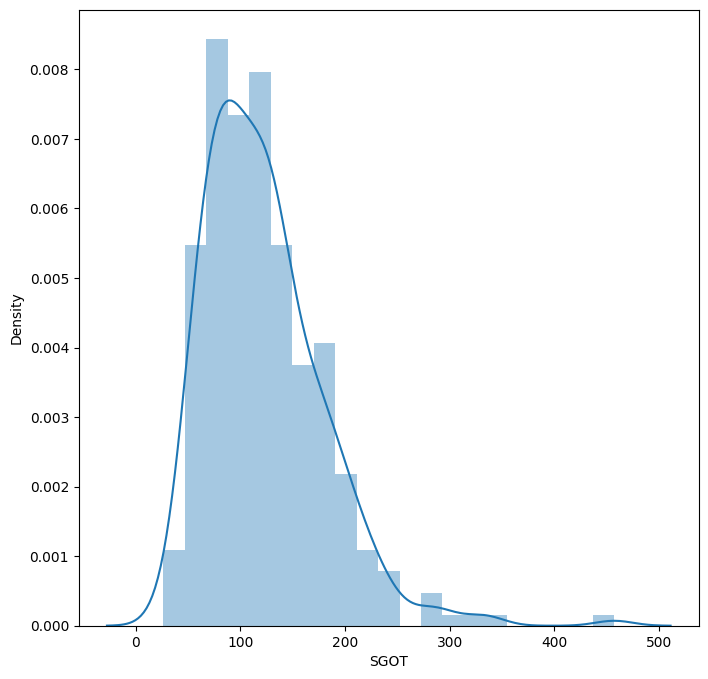

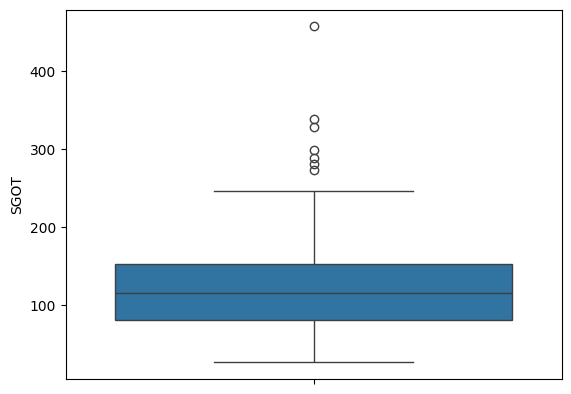

posx and posy should be finite values
posx and posy should be finite values


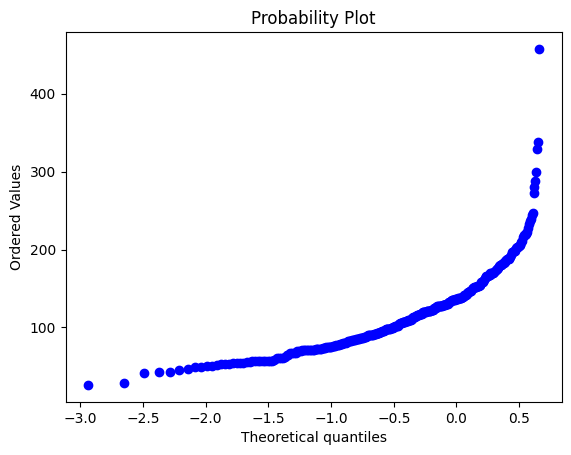

----------------------------
Tryglicerides
Skewness: 2.5239024664577845
Kurtosis: 11.802753128498216


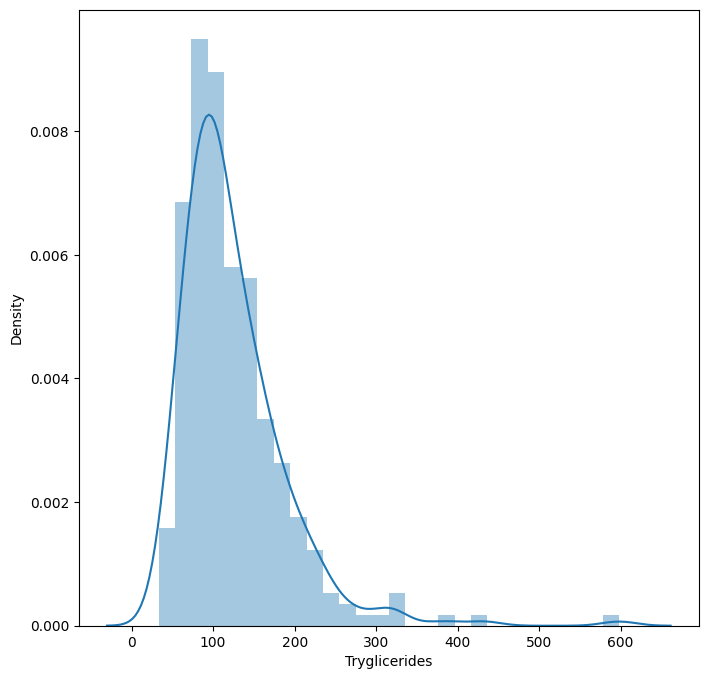

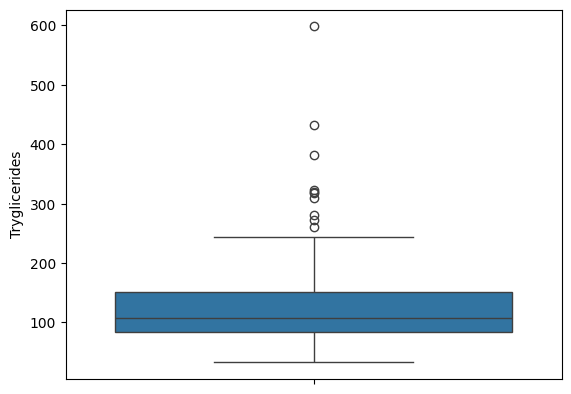

posx and posy should be finite values
posx and posy should be finite values


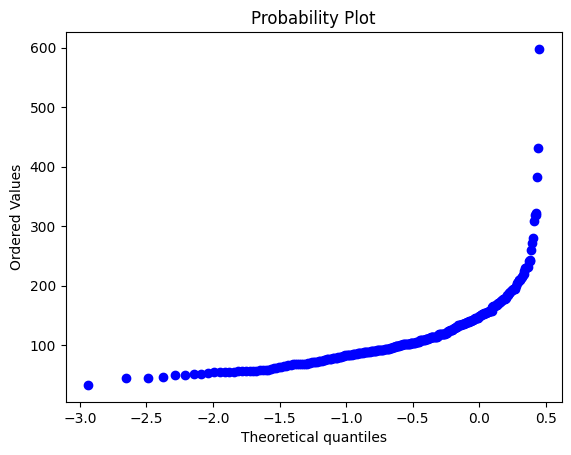

----------------------------
Platelets
Skewness: 0.6270977603715678
Kurtosis: 0.8630445578915271


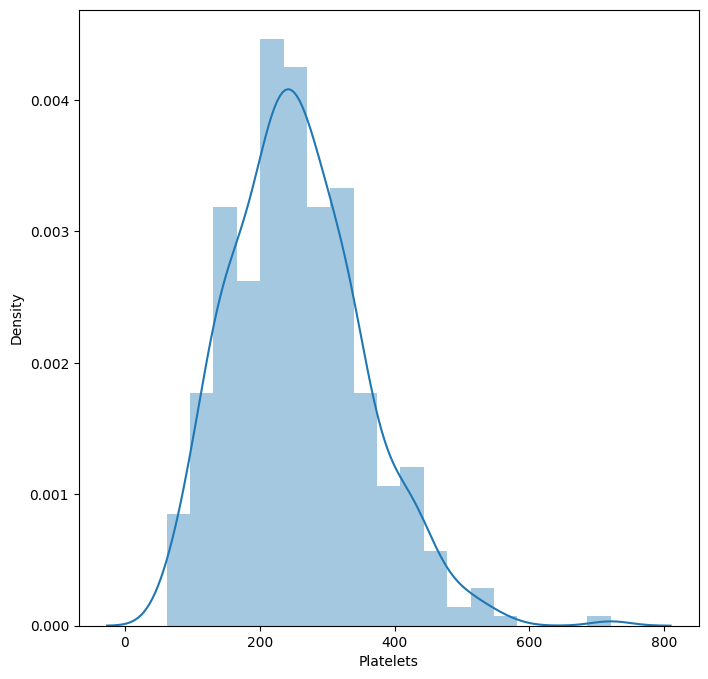

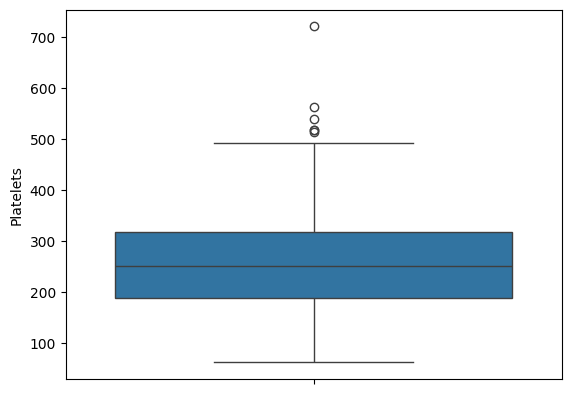

posx and posy should be finite values
posx and posy should be finite values


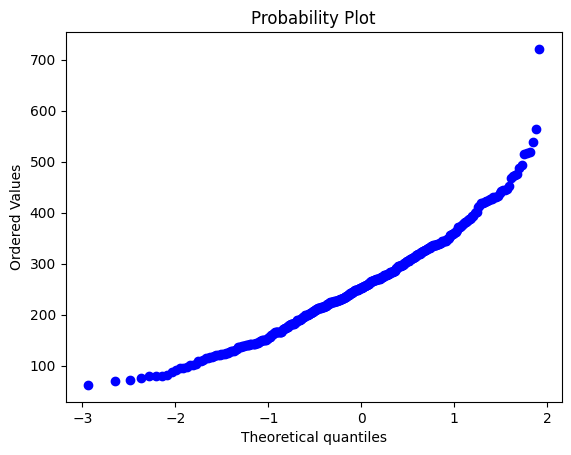

----------------------------
Prothrombin
Skewness: 2.223276154109735
Kurtosis: 10.040772735082795


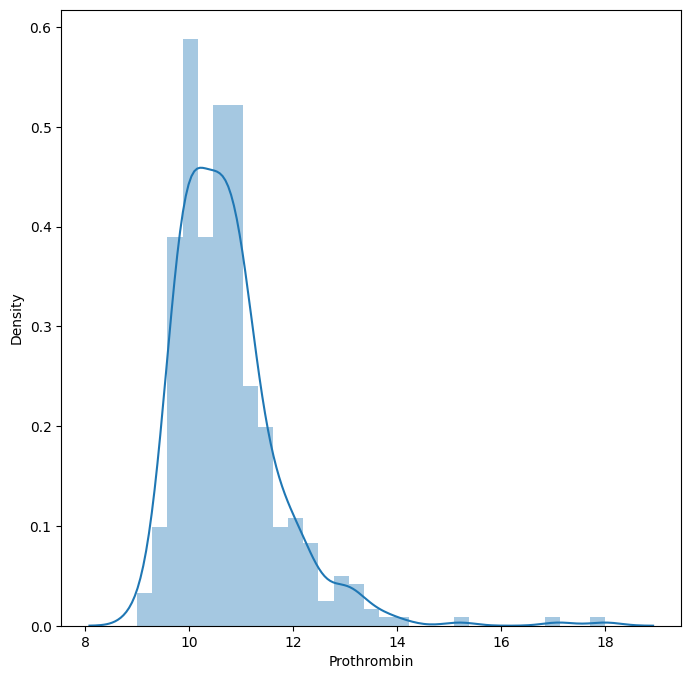

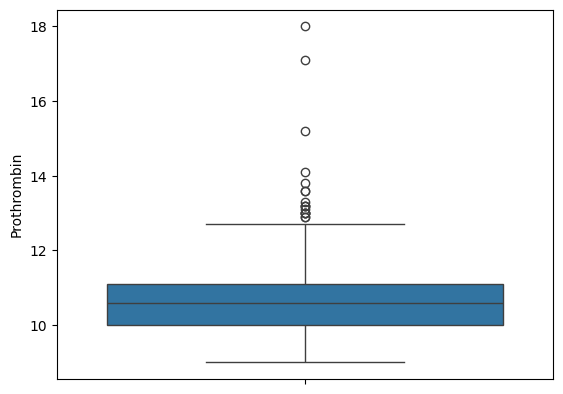

posx and posy should be finite values
posx and posy should be finite values


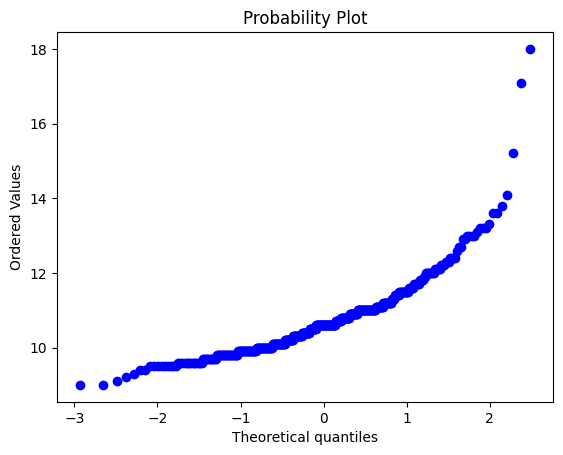

----------------------------


In [16]:
for col in df.columns:
    if df[col].dtypes != 'object':
        if col not in ['Stage']:
            print(col.title())
            print("Skewness:",df[col].skew())
            print("Kurtosis:",df[col].kurtosis())
            plt.figure(figsize=(8,8))
            sns.distplot(df[col])
            plt.show()
            sns.boxplot(df[col])
            plt.show()
            scipy.stats.probplot(df[col],plot=plt,rvalue=True)
            plt.show()
            print('----------------------------')



In [17]:
def pie_chart(df,col):
    labels = df[col].value_counts().keys()
    values = df[col].value_counts().values
    explode = [0]*np.size(labels)
    explode[0] = 0.2
    explode[1] = 0.1
    plt.figure(figsize=(8,8))
    plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.2f%%')
    plt.show()


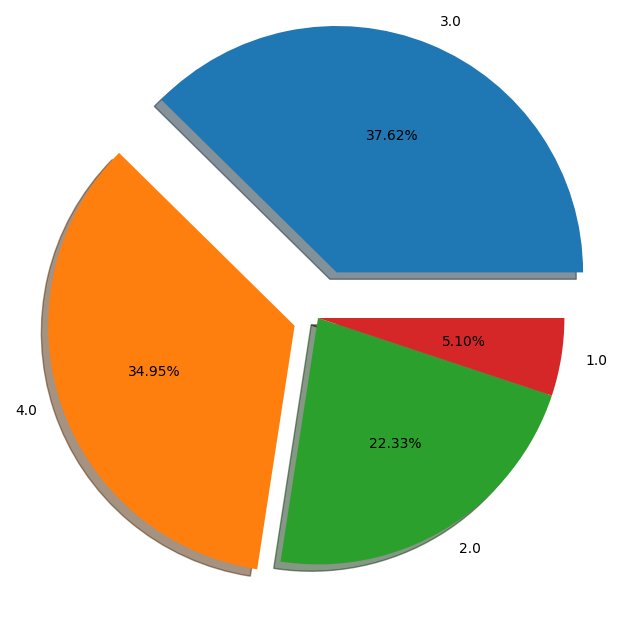

In [18]:
pie_chart(df,'Stage')


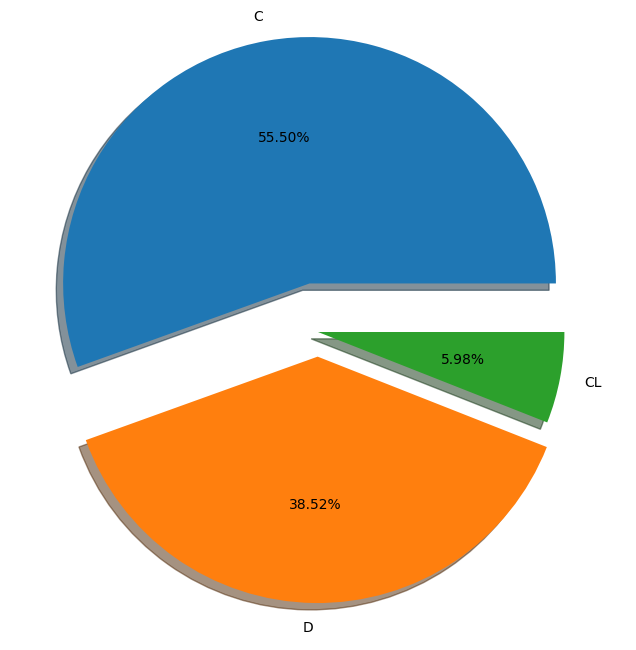

In [19]:
pie_chart(df,'Status')


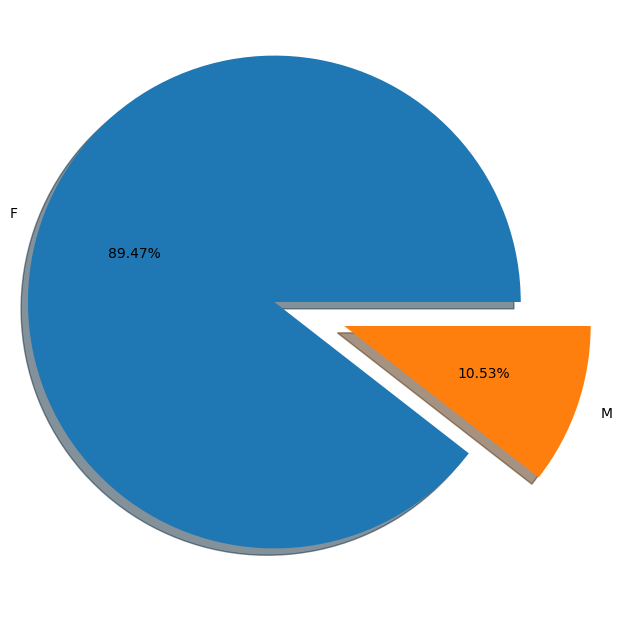

In [20]:
pie_chart(df,'Sex')


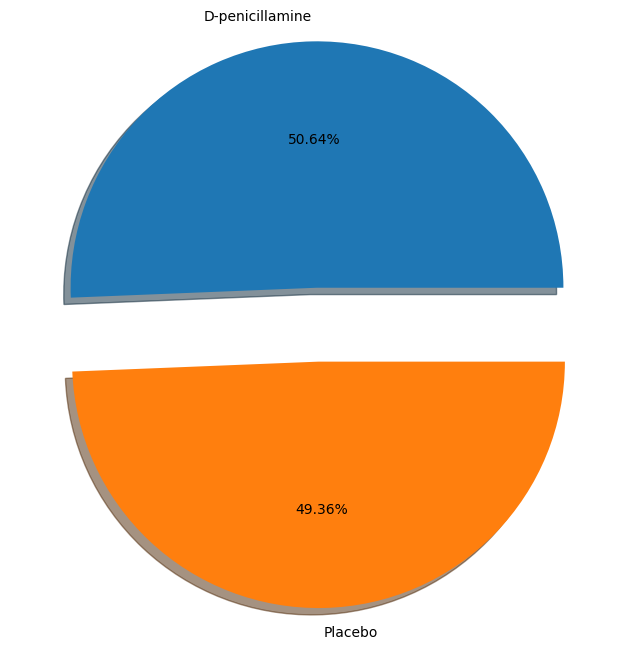

In [21]:
pie_chart(df,'Drug')

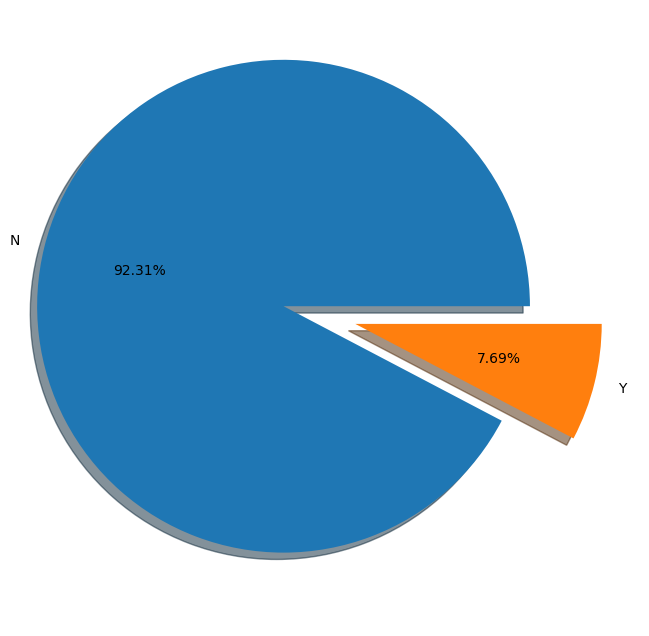

In [22]:
pie_chart(df,'Ascites')

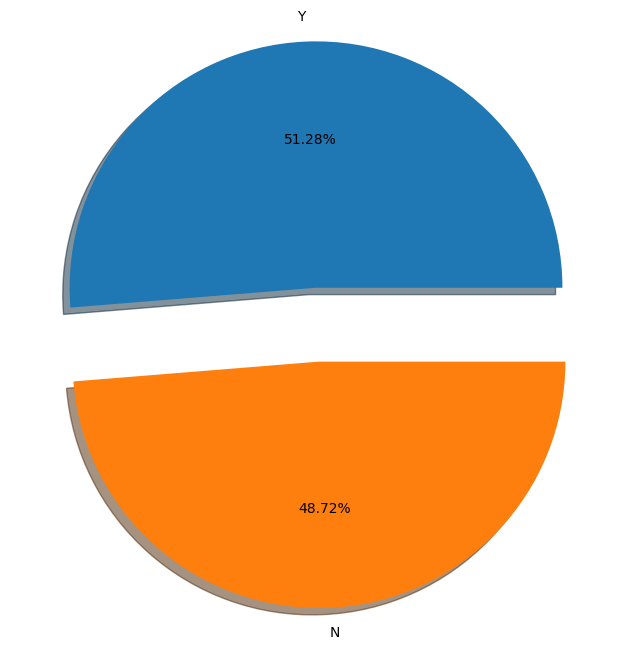

In [23]:
pie_chart(df,'Hepatomegaly')

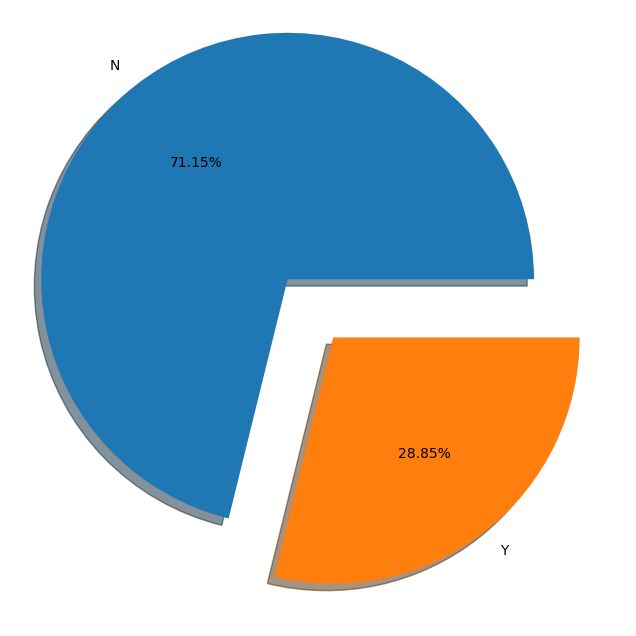

In [24]:
pie_chart(df,'Spiders')

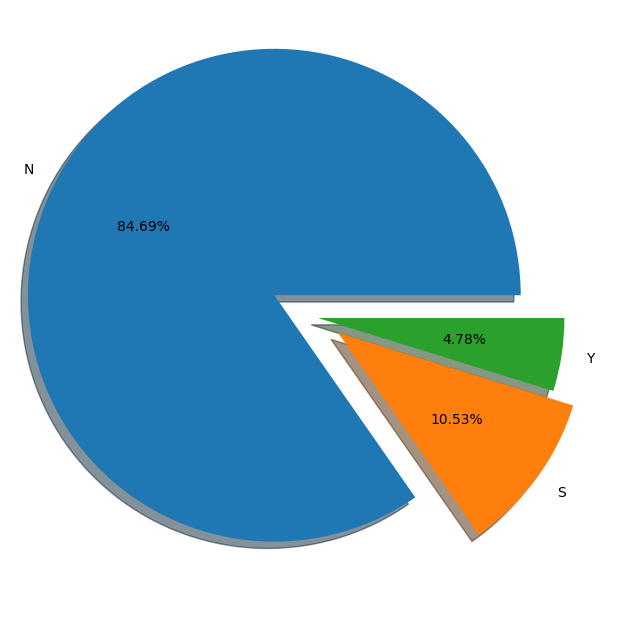

In [25]:
pie_chart(df,'Edema')

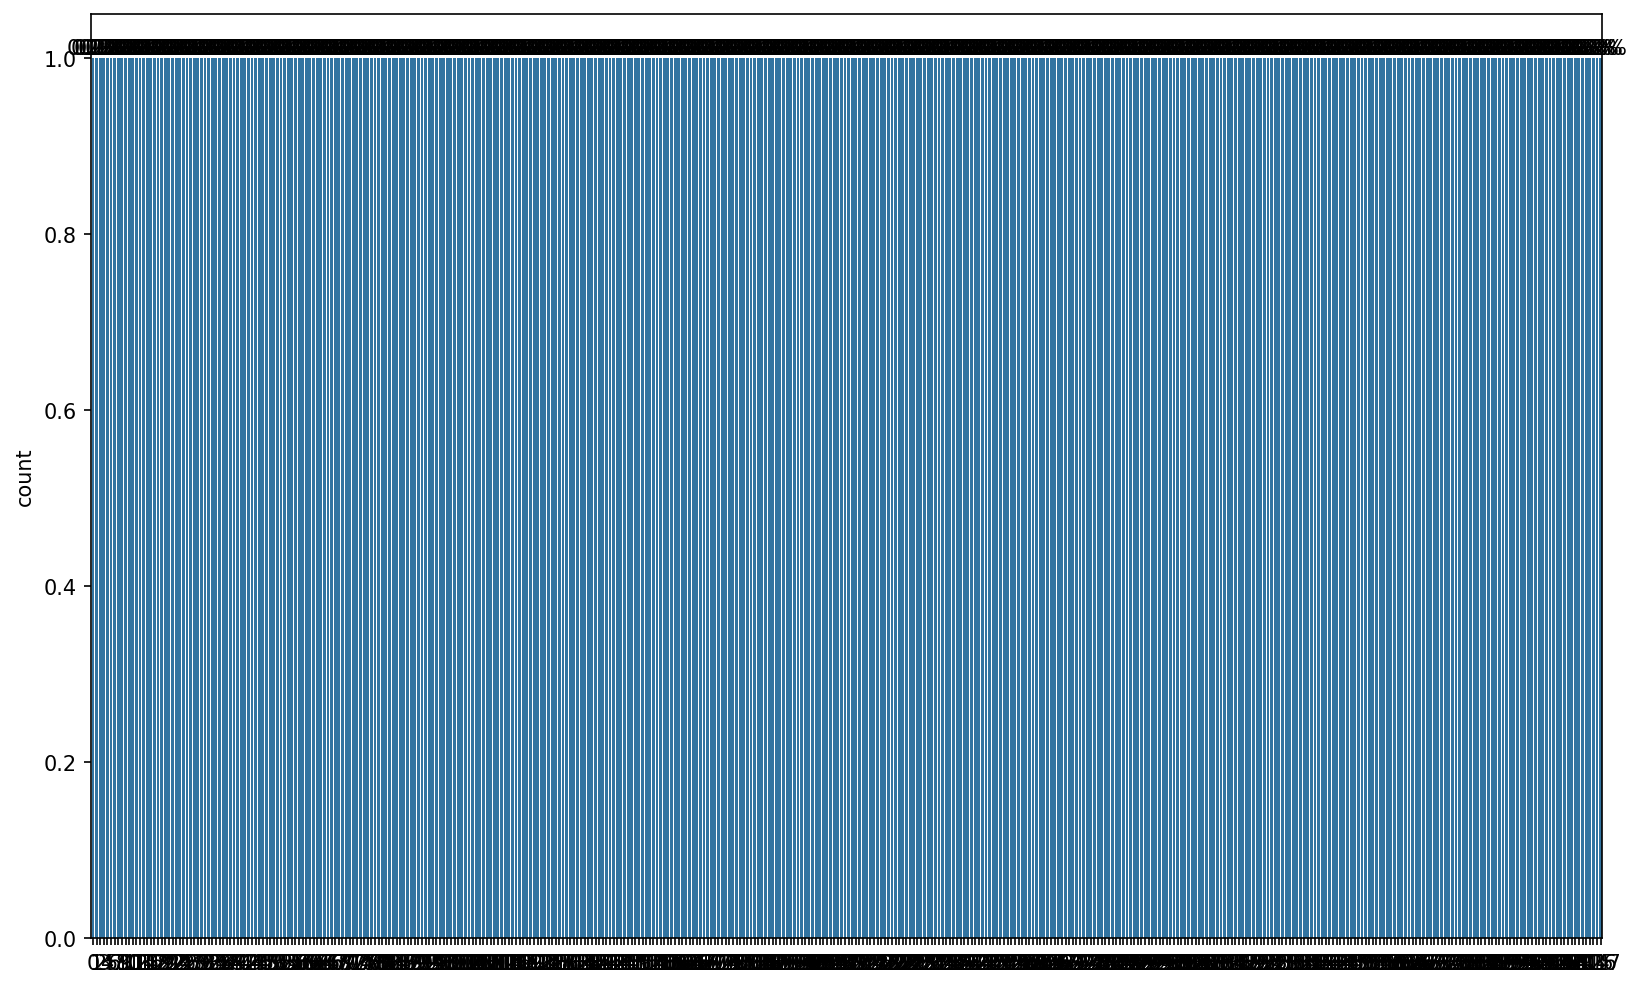

In [26]:
plt.figure(figsize=(13,8),dpi=150)
ax = sns.countplot(df.Stage)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/len(df)), (x.mean(), y), 
            ha='center', va='bottom')

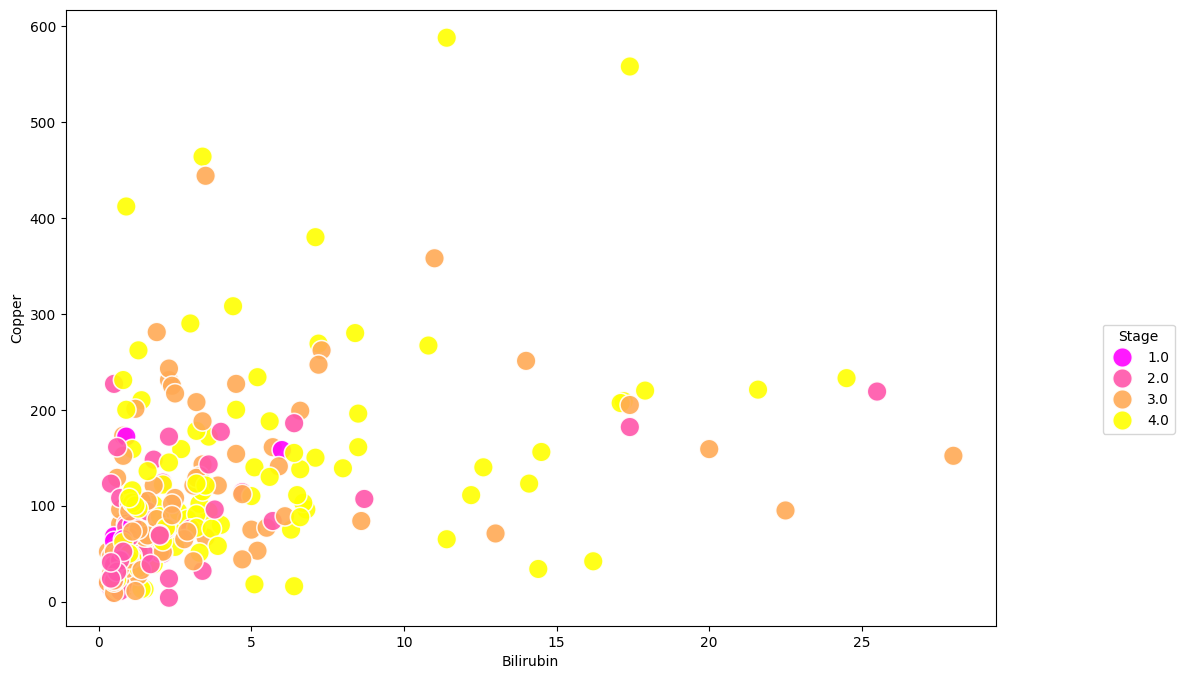

In [27]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='Bilirubin',y='Copper',data=df,hue='Stage',s=200,alpha=0.9,palette='spring')
plt.legend(bbox_to_anchor=(1.2,0.5),title="Stage")

In [28]:

males = df[df.Sex == 'M']
females = df[df.Sex == 'F']

In [29]:
males.describe()

N_Days           Age  Bilirubin  Cholesterol    Albumin  \
count    44.000000     44.000000  44.000000    35.000000  44.000000   
mean   1894.022727  20348.340909   2.865909   362.457143   3.535000   
std    1213.034356   4009.641699   2.319477   178.993319   0.456598   
min     140.000000  12227.000000   0.600000   151.000000   2.270000   
25%    1060.750000  17886.000000   1.300000   245.000000   3.327500   
50%    1507.000000  19724.000000   2.050000   317.000000   3.645000   
75%    2715.750000  23588.750000   3.500000   426.500000   3.870000   
max    4459.000000  28650.000000   9.500000  1000.000000   4.300000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count   36.000000     36.000000   36.000000      35.000000   43.000000   
mean   154.277778   2172.950000  121.990556     133.428571  231.139535   
std    100.665389   2418.446239   47.013095      52.168441   85.225634   
min     13.000000    516.000000   46.500000      49.000000   70.000000   
25%     80.750000    852.000000   82.770000      91.000000  165.500000   
50%    134.500000   1116.000000  121.675000     126.000000  217.000000   
75%    211.750000   2313.000000  153.450000     163.000000  298.500000   
max    444.000000  10396.800000  221.880000     242.000000  394.000000   

       Prothrombin      Stage  
count    44.000000  44.000000  
mean     10.940909   3.068182  
std       0.931445   0.925045  
min       9.700000   1.000000  
25%      10.275000   2.750000  
50%      10.900000   3.000000  
75%      11.225000   4.000000  
max      14.100000   4.000000

In [30]:

females.describe()

N_Days           Age   Bilirubin  Cholesterol     Albumin  \
count   374.000000    374.000000  374.000000   249.000000  374.000000   
mean   1920.577540  18319.823529    3.262567   370.502008    3.493021   
std    1092.953174   3740.397415    4.591388   238.726563    0.421527   
min      41.000000   9598.000000    0.300000   120.000000    1.960000   
25%    1095.500000  15478.750000    0.700000   252.000000    3.240000   
50%    1773.000000  18333.000000    1.300000   309.000000    3.520000   
75%    2606.250000  20819.000000    3.400000   395.000000    3.767500   
max    4795.000000  28018.000000   28.000000  1775.000000    4.640000   

           Copper      Alk_Phos        SGOT  Tryglicerides   Platelets  \
count  274.000000    276.000000  276.000000     247.000000  364.000000   
mean    90.208029   1957.834783  122.630145     123.465587  260.082418   
std     80.738377   2105.049047   57.916646      66.780963   99.418385   
min      4.000000    289.000000   26.350000      33.000000   62.000000   
25%     40.000000    877.500000   80.600000      84.000000  190.000000   
50%     67.000000   1270.500000  113.335000     106.000000  252.500000   
75%    111.750000   1963.750000  151.900000     146.000000  319.000000   
max    588.000000  13862.400000  457.250000     598.000000  721.000000   

       Prothrombin       Stage  
count   372.000000  368.000000  
mean     10.706989    3.019022  
std       1.030534    0.877926  
min       9.000000    1.000000  
25%      10.000000    2.000000  
50%      10.600000    3.000000  
75%      11.100000    4.000000  
max      18.000000    4.000000

In [31]:
round(males.Status.value_counts() / len(males) * 100,2)

Status
D     54.55
C     38.64
CL     6.82
Name: count, dtype: float64

In [32]:
round(females.Status.value_counts() / len(females) * 100,2)

Status
C     57.49
D     36.63
CL     5.88
Name: count, dtype: float64

In [33]:
round(males.Stage.value_counts() / len(males) * 100,2)

Stage
4.0    38.64
3.0    36.36
2.0    18.18
1.0     6.82
Name: count, dtype: float64

In [34]:
round(females.Stage.value_counts() / len(females) * 100,2)

Stage
3.0    37.17
4.0    33.96
2.0    22.46
1.0     4.81
Name: count, dtype: float64

In [35]:

round(males.Hepatomegaly.value_counts() / len(males) * 100,2)


Hepatomegaly
Y    47.73
N    34.09
Name: count, dtype: float64

In [36]:
round(females.Hepatomegaly.value_counts() / len(females) * 100,2)

Hepatomegaly
Y    37.17
N    36.63
Name: count, dtype: float64

In [38]:
df

N_Days Status             Drug    Age Sex Ascites Hepatomegaly Spiders  \
0       400      D  D-penicillamine  21464   F       Y            Y       Y   
1      4500      C  D-penicillamine  20617   F       N            Y       Y   
2      1012      D  D-penicillamine  25594   M       N            N       N   
3      1925      D  D-penicillamine  19994   F       N            Y       Y   
4      1504     CL          Placebo  13918   F       N            Y       Y   
..      ...    ...              ...    ...  ..     ...          ...     ...   
413     681      D              NaN  24472   F     NaN          NaN     NaN   
414    1103      C              NaN  14245   F     NaN          NaN     NaN   
415    1055      C              NaN  20819   F     NaN          NaN     NaN   
416     691      C              NaN  21185   F     NaN          NaN     NaN   
417     976      C              NaN  19358   F     NaN          NaN     NaN   

    Edema  Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  \
0       Y       14.5        261.0     2.60   156.0    1718.0  137.95   
1       N        1.1        302.0     4.14    54.0    7394.8  113.52   
2       S        1.4        176.0     3.48   210.0     516.0   96.10   
3       S        1.8        244.0     2.54    64.0    6121.8   60.63   
4       N        3.4        279.0     3.53   143.0     671.0  113.15   
..    ...        ...          ...      ...     ...       ...     ...   
413     N        1.2          NaN     2.96     NaN       NaN     NaN   
414     N        0.9          NaN     3.83     NaN       NaN     NaN   
415     N        1.6          NaN     3.42     NaN       NaN     NaN   
416     N        0.8          NaN     3.75     NaN       NaN     NaN   
417     N        0.7          NaN     3.29     NaN       NaN     NaN   

     Tryglicerides  Platelets  Prothrombin  Stage  
0            172.0      190.0         12.2    4.0  
1             88.0      221.0         10.6    3.0  
2             55.0      151.0         12.0    4.0  
3             92.0      183.0         10.3    4.0  
4             72.0      136.0         10.9    3.0  
..             ...        ...          ...    ...  
413            NaN      174.0         10.9    3.0  
414            NaN      180.0         11.2    4.0  
415            NaN      143.0          9.9    3.0  
416            NaN      269.0         10.4    3.0  
417            NaN      350.0         10.6    4.0  

[418 rows x 19 columns]

In [39]:
result

NameError: name 'result' is not defined

In [37]:

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='plasma',vmin=-1,vmax=1)

ValueError: could not convert string to float: 'D'

<Figure size 1200x800 with 0 Axes>

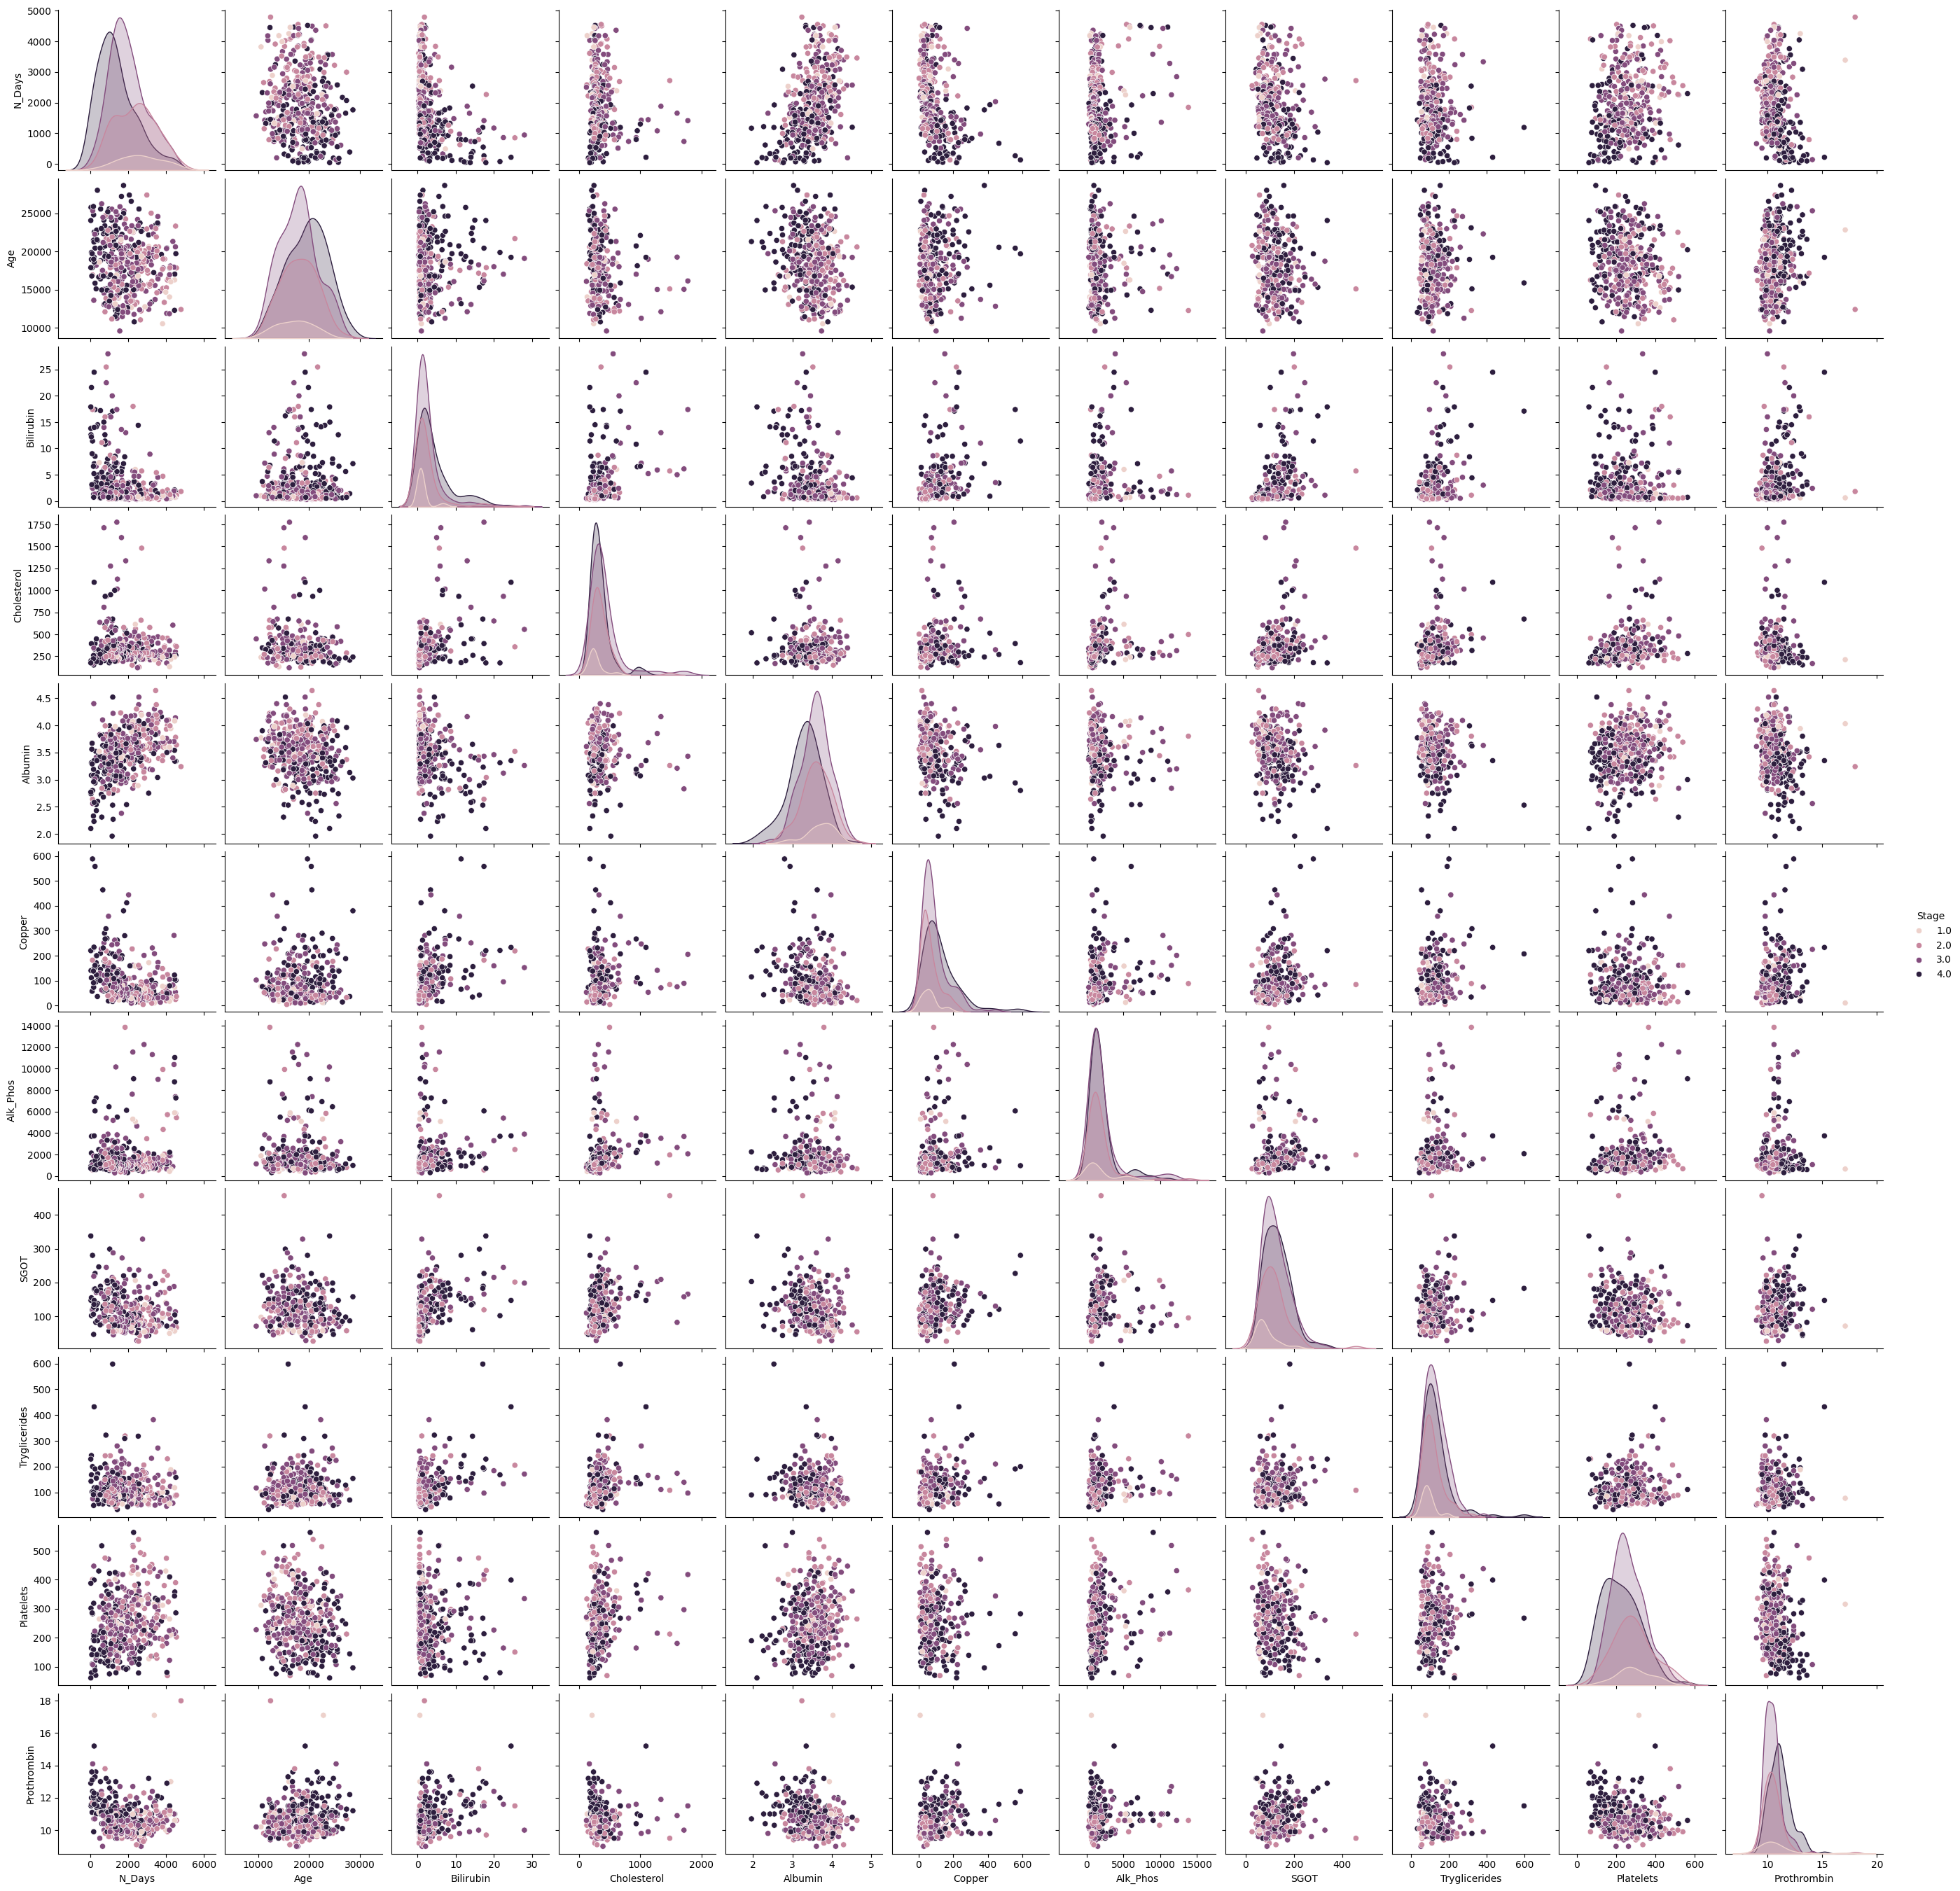

In [39]:
sns.pairplot(df,hue='Stage')

In [40]:
for col in df.columns:
    if df[col].dtypes != 'object':
        df[col].fillna(df[col].median(),inplace=True)
    else:
        df[col].fillna(df[col].mode()[0],inplace=True)

In [41]:
for col in df.columns:
    if df[col].dtypes != 'object':
        lower_limit, upper_limit = df[col].quantile([0.25,0.75])
        IQR = upper_limit - lower_limit
        lower_whisker = lower_limit - 1.5 * IQR
        upper_whisker = upper_limit + 1.5 * IQR
        df[col] = np.where(df[col]>upper_whisker,upper_whisker,np.where(df[col]<lower_whisker,lower_whisker,df[col]))


In [42]:
df.Sex.replace(['M','F'],[1,0],inplace=True)
df.Sex = df.Sex.astype(np.float64)
df.Edema.replace(['N','S','Y'],[0,-1,1],inplace=True)
df.Edema = df.Edema.astype(np.float64)
df.Ascites.replace(['Y','N'],[1,0],inplace=True)
df.Hepatomegaly.replace(['Y','N'],[1,0],inplace=True)
df.Spiders.replace(['Y','N'],[1,0],inplace=True)
df.Ascites = df.Ascites.astype(np.float64)
df.Hepatomegaly = df.Hepatomegaly.astype(np.float64)
df.Spiders = df.Spiders.astype(np.float64)
df.Drug.replace(['D-penicillamine','Placebo'],[0,1],inplace=True)
df.Drug = df.Drug.astype(np.float64)
df.Stage = df.Stage.astype(np.int64)

In [43]:

X = df.drop(['Stage','N_Days','Status'],axis=1)
y = df.Stage

<Axes: ylabel='count'>

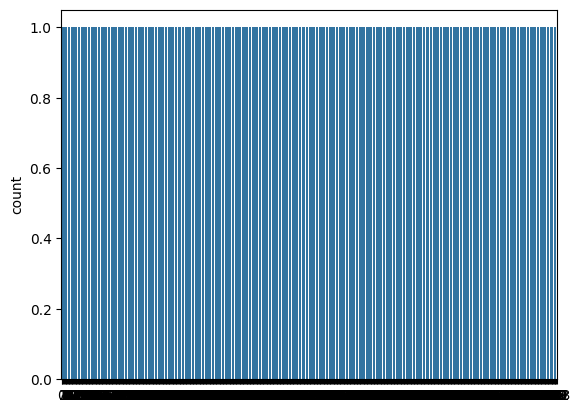

In [44]:
smote = SMOTE()
X,y = smote.fit_resample(X,y)
sns.countplot(y)


In [45]:

scaler = StandardScaler()
features = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=features)
X.head()

Drug       Age       Sex   Ascites  Hepatomegaly   Spiders     Edema  \
0 -0.745901  0.879101 -0.383129  4.830521      0.950728  2.259833  3.137738   
1 -0.745901  0.646974 -0.383129 -0.217115      0.950728  2.259833  0.167834   
2 -0.745901  2.010958  3.019422 -0.217115     -1.175019 -0.476141 -2.802070   
3 -0.745901  0.476236 -0.383129 -0.217115      0.950728  2.259833 -2.802070   
4  1.500472 -1.188937 -0.383129 -0.217115      0.950728  2.259833  0.167834   

   Bilirubin  Cholesterol   Albumin    Copper  Alk_Phos      SGOT  \
0   2.300343    -0.711372 -2.439006  1.777619  0.603755  0.676148   
1  -0.547219    -0.137631  1.566114 -0.560099  2.283004  0.036295   
2  -0.409434    -1.900834 -0.150366  2.213076 -1.361638 -0.419957   
3  -0.225720    -0.949264 -2.595050 -0.330911  2.283004 -1.348961   
4   0.509134    -0.459486 -0.020330  1.479675 -1.108197  0.026604   

   Tryglicerides  Platelets  Prothrombin  
0       2.038739  -0.859019     1.969064  
1      -0.701532  -0.508678    -0.042680  
2      -1.778067  -1.299771     1.717596  
3      -0.571043  -0.938129    -0.419882  
4      -1.223488  -1.469291     0.334522

In [46]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [47]:

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [48]:

y_pred = logmodel.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.48      0.64      0.55        50
           2       0.25      0.17      0.20        52
           3       0.34      0.38      0.36        39
           4       0.71      0.64      0.67        53

    accuracy                           0.46       194
   macro avg       0.45      0.46      0.45       194
weighted avg       0.45      0.46      0.45       194



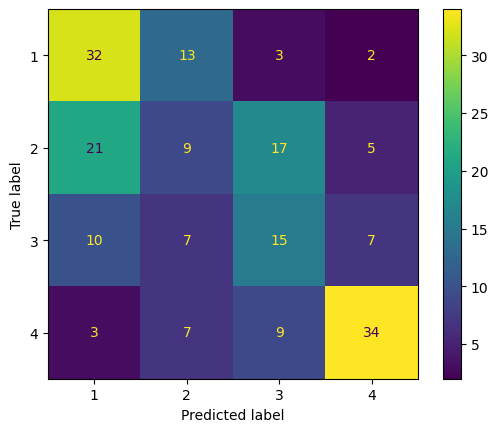

In [49]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(logmodel,X_test,y_test)

In [50]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [51]:
svm_pred = svm.predict(X_test)
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           1       0.67      0.88      0.76        50
           2       0.53      0.38      0.44        52
           3       0.30      0.36      0.33        39
           4       0.66      0.55      0.60        53

    accuracy                           0.55       194
   macro avg       0.54      0.54      0.53       194
weighted avg       0.55      0.55      0.54       194



In [52]:

scores = []
for i in np.arange(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores.append(knn.score(X_test,y_test))

Text(0, 0.5, 'Accuracy Score')

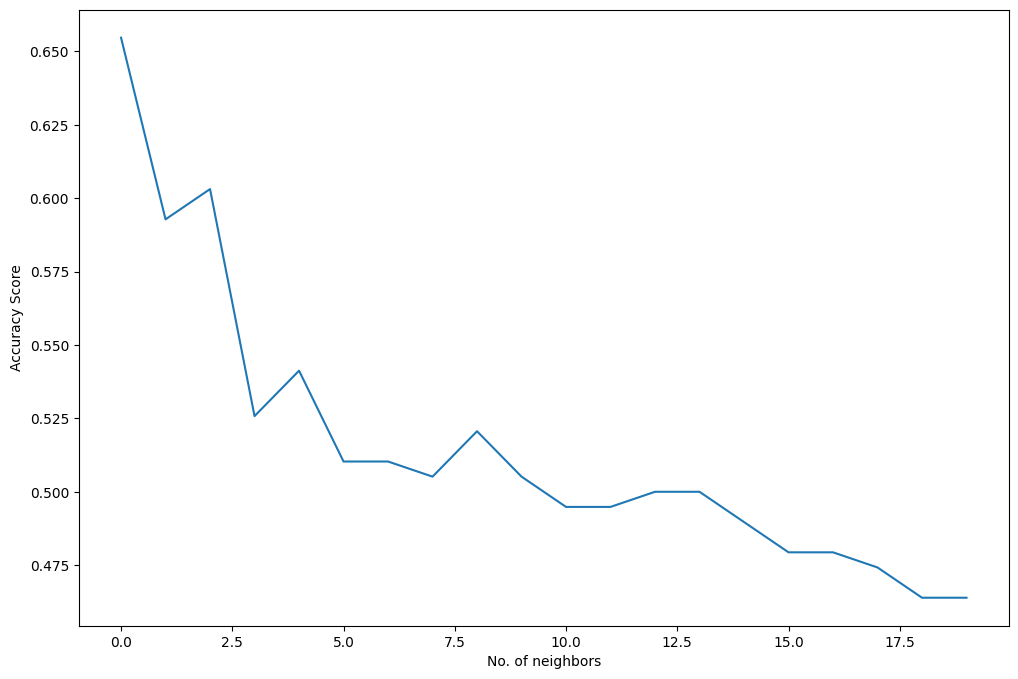

In [53]:
plt.figure(figsize=(12,8))
sns.lineplot(scores)
plt.xlabel('No. of neighbors')
plt.ylabel('Accuracy Score')

In [54]:

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print(classification_report(y_test,knn_pred))

[[44  1  5  0]
 [27 12  6  7]
 [11  8 15  5]
 [ 7  8 16 22]]
              precision    recall  f1-score   support

           1       0.49      0.88      0.63        50
           2       0.41      0.23      0.30        52
           3       0.36      0.38      0.37        39
           4       0.65      0.42      0.51        53

    accuracy                           0.48       194
   macro avg       0.48      0.48      0.45       194
weighted avg       0.49      0.48      0.46       194



In [55]:

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

dtree_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_pred))
print(classification_report(y_test,dtree_pred))

[[37  9  3  1]
 [10 20 11 11]
 [ 2  8 20  9]
 [ 2  9 20 22]]
              precision    recall  f1-score   support

           1       0.73      0.74      0.73        50
           2       0.43      0.38      0.41        52
           3       0.37      0.51      0.43        39
           4       0.51      0.42      0.46        53

    accuracy                           0.51       194
   macro avg       0.51      0.51      0.51       194
weighted avg       0.52      0.51      0.51       194



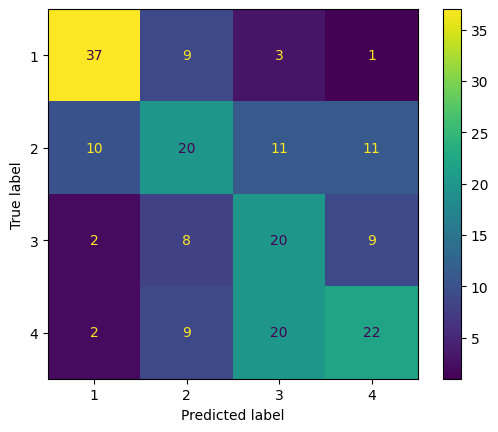

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(dtree,X_test,y_test)

In [57]:
scores = []
for i in np.arange(100,1001,100):
    rf = RandomForestClassifier(n_estimators=i)
    rf.fit(X_train,y_train)
    scores.append(rf.score(X_test,y_test))

Text(0, 0.5, 'Accuracy Score')

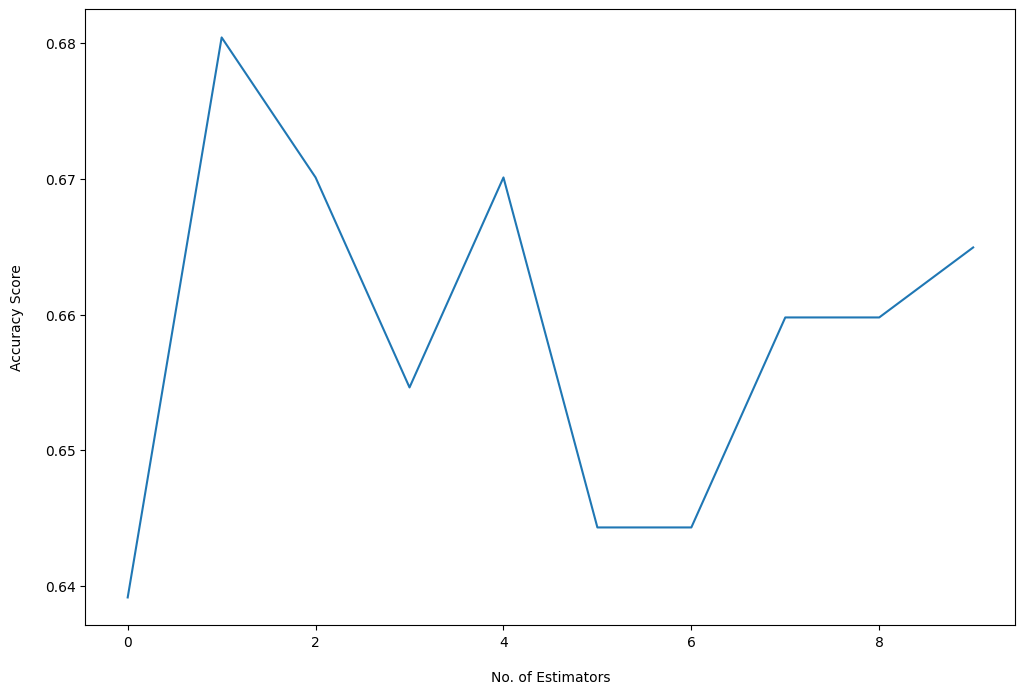

In [58]:
plt.figure(figsize=(12,8))
sns.lineplot(scores)
plt.xlabel('No. of Estimators',labelpad=15)
plt.ylabel('Accuracy Score',labelpad=15)


In [59]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[48  0  1  1]
 [ 6 29 13  4]
 [ 5  6 22  6]
 [ 1  3 17 32]]
              precision    recall  f1-score   support

           1       0.80      0.96      0.87        50
           2       0.76      0.56      0.64        52
           3       0.42      0.56      0.48        39
           4       0.74      0.60      0.67        53

    accuracy                           0.68       194
   macro avg       0.68      0.67      0.67       194
weighted avg       0.70      0.68      0.68       194



<Axes: xlabel='Importance', ylabel='Feature'>

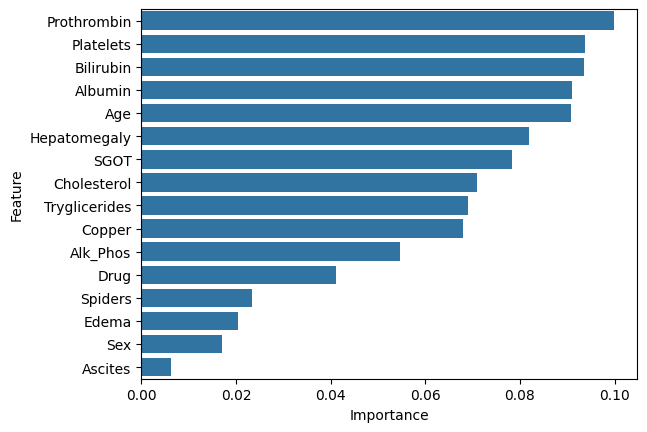

In [60]:
feature_importances = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis=1)
feature_importances.columns = ['Feature','Importance']
feature_importances = feature_importances.sort_values('Importance',ascending=False)
sns.barplot(x='Importance',y='Feature',data=feature_importances,orient='h')


In [61]:
print("Accuracy Score of Logistic Regression:",str(np.round(logmodel.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of K Neighbors Classifier:",str(np.round(knn.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Support Vector Classifier:",str(np.round(svm.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Decision Tree Classifier:",str(np.round(dtree.score(X_test,y_test)*100,2)) + '%')
print("Accuracy Score of Random Forest Classifier:",str(np.round(rf.score(X_test,y_test)*100,2)) + '%')



Accuracy Score of Logistic Regression: 46.39%
Accuracy Score of K Neighbors Classifier: 47.94%
Accuracy Score of Support Vector Classifier: 55.15%
Accuracy Score of Decision Tree Classifier: 51.03%
Accuracy Score of Random Forest Classifier: 67.53%
